In [14]:
from rich.pretty import pprint
import seaborn as sns

## The Function Approximation Benchmark
Let's take a look at function approximation. This is a toy benchmark to test simple function approximation. The task is to predict the value of afunction in each of n dimensions as specified by the instance. First, let's make a benchmark instance:

In [15]:
from dacbench.benchmarks import FunctionApproximationBenchmark
bench = FunctionApproximationBenchmark()

Now let's take a look at the elements of the config in this benchmark:

In [16]:
pprint(list(bench.config.keys()))

[
│   'config_space',
│   'observation_space_class',
│   'observation_space_type',
│   'observation_space_args',
│   'discrete',
│   'reward_range',
│   'cutoff',
│   'seed',
│   'multi_agent',
│   'omit_instance_type',
│   'instance_set_path',
│   'test_set_path',
│   'benchmark_info'
]

The 'benchmark_info' tells us some things about this benchmark already:

In [17]:
pprint(bench.config["benchmark_info"])

{
│   'identifier': 'FunctionApproximation',
│   'name': 'Function Approximation',
│   'reward': 'Multiplied Differences between Function and Action in each Dimension',
│   'state_description': [
│   │   'Remaining Budget',
│   │   'Shift (dimension 1)',
│   │   'Slope (dimension 1)',
│   │   'Shift (dimension 2)',
│   │   'Slope (dimension 2)',
│   │   'Shift (dimension 3)',
│   │   'Slope (dimension 3)',
│   │   'Action 1',
│   │   'Action 2',
│   │   'Action 3'
│   ]
}

The 'config_space' specifies which actions are taken, i.e. which hyperparameters are configured. We can see that a float "value_dim_1" and an integer "value_dim_2" is configured.

In [18]:
pprint(bench.config["config_space"])

Configuration space object:
  Hyperparameters:
│   value_dim_1, Type: UniformFloat, Range: [0.0, 1.0], Default: 0.5
│   value_dim_2, Type: UniformInteger, Range: [0, 10], Default: 5

The reward in this task has the following reward range:

In [19]:
pprint(bench.config["reward_range"])

(0, 1)

Finally, the cutoff shows how many steps of the sequence are necessary for solution:

In [20]:
pprint(bench.config["cutoff"])

10

The config also contains some standard keys like the seed, instance set, multi agent mode or observation space config. The observation space usually does not need to be configured at all while the seed should be varied between runs. Multi agent mode has its own example which better shows how it works. 'discrete' and 'omit_instance_type' are benchmark-specifi: 'discrete' specifies if in some dimensions only discrete values can be predicted to approximate that dimension's function while 'omit_instance_type' will not use the identifier in the observations if true (usually used if only a single function type is used).

## Function Approximation Instances
Now let's take a look at how a function approximation instance looks. To do so, we first read the default instance set and look at its first element:

In [21]:
pprint(bench.config["instance_set_path"])
bench.read_instance_set()
pprint(bench.config.instance_set[0])

'sigmoid_2D3M_train.csv'

FunctionApproximationInstance(
│   functions=[
│   │   <dacbench.envs.env_utils.toy_functions.SigmiodFunction object at 0x302a8f820>,
│   │   <dacbench.envs.env_utils.toy_functions.SigmiodFunction object at 0x30355e410>
│   ],
│   dimension_importances=[0.5, 0.5],
│   discrete=(False, 10),
│   omit_instance_type=False
)

As you can see, the instance contains 'discrete' and 'omit_instance_type' from the config again. Additionally, there are the actual 'functions' (in this case two sigmoids) to approximate and 'dimension_importances' which weight each function to imitate hyperparameter importances. Let's look at how the functions work:

'Function 1 evaluated at 0: 3.99993384269159e-16'

'Minimum of function 1: 0'

<Axes: >

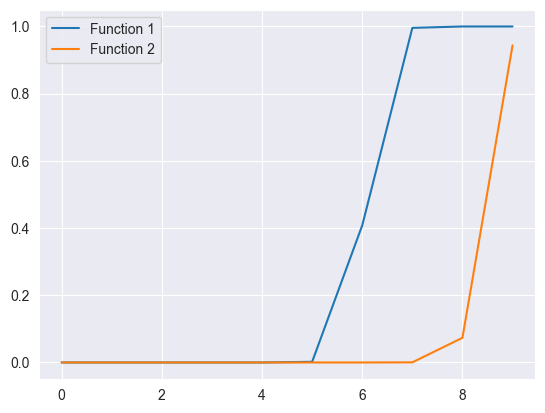

In [22]:
pprint(f"Function 1 evaluated at 0: {bench.config.instance_set[0].functions[0](0)}")
pprint(f"Minimum of function 1: {bench.config.instance_set[0].functions[0].fmin}")
values_f1 = bench.config.instance_set[0].functions[0]([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
values_f2 = bench.config.instance_set[0].functions[1]([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
sns.lineplot(x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], y=values_f1, label="Function 1")
sns.lineplot(x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], y=values_f2, label="Function 2")

The available functions for these instances are:
- sigmoid
- constant
- logarithmic
- quadratic
- polynomial

## Running Function Approximation
Lastly, let's look at the function approximation benchmark in action - for this we'll use the benchmark version of this environment, i.e. the one proposed by Biedenkapp et al. in 2020. As we can see, we are tasked with approximating three sigmoids for each of which we are given three discrete values. The state tells us how many steps we have left, the scaling and inflection point of the sigmoid as well as the last guess initialized at -1:

In [23]:
env = bench.get_benchmark(dimension=3, seed=0)
pprint(env.instance)
pprint(env.reset())

FunctionApproximationInstance(
│   functions=[
│   │   <dacbench.envs.env_utils.toy_functions.SigmiodFunction object at 0x30355e920>,
│   │   <dacbench.envs.env_utils.toy_functions.SigmiodFunction object at 0x30355fb20>,
│   │   <dacbench.envs.env_utils.toy_functions.SigmiodFunction object at 0x30355fac0>
│   ],
│   dimension_importances=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333],
│   discrete=[3, 3, 3],
│   omit_instance_type=True
)

(
│   array([10.        ,  1.7862544 ,  7.30629295,  1.53270746,  4.90764086,
│   │   4.01627273, 11.160623  , -1.        , -1.        , -1.        ]),
│   {}
)

If we take a step, we see the updated timestep and last action:

In [24]:
action = env.action_space.sample()
state, reward, terminated, truncated, info = env.step(action)
pprint(state)

array([ 9.        ,  1.7862544 ,  7.30629295,  1.53270746,  4.90764086,
│   │   4.01627273, 11.160623  ,  1.        ,  1.        ,  0.        ])

Furthermore, we also get a reward and termination and truncation signals. Truncation will be set to true after the number of steps exceeds the cutoff.

In [25]:
pprint(f"Reward {reward}")
pprint(f"Terminated {terminated}")
pprint(f"Truncated {truncated}")

'Reward 8.524310378138883e-05'

'Terminated False'

'Truncated False'